In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 10000)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
df = pd.read_csv("train.csv")
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    ...            0    NaN   NaN         NaN       0      2   2008        WD         Normal     208500
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub    ...            0    NaN   NaN         NaN       0      5   2007        WD         Normal     181500
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0      9   2008        WD         Normal     223500
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0      2   2006        WD        Abnorml     140000
4   5          60       RL         84.0    14260   Pave   NaN      IR1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0     12   2008        WD         Normal     250000

[5 rows x 81 columns]

In [3]:
#Data Understanding, Preparation and EDA 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
#Check for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [5]:
#u can see there are no duplicates
#shape
df.shape

(1460, 81)

In [6]:
#inspecting null values
round(100*(df.isnull().sum()/len(df.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [7]:
#There  are lot of columns with very high null values
#let us consider some such columns
df.MiscFeature.unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [8]:
df.Fence.unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [9]:
df.PoolQC.unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [10]:
#The  presene of Nan  cannot  be treated as null values 
#It  indicate the required item is absent  in that observation
#we need to fill the Nan value with Absent  and treat the null value


In [11]:
d_type_col=df.columns.to_series().groupby(df.dtypes).groups
d_type_col


{dtype('int64'): Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], dtype='object'),
 dtype('float64'): Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object'),
 dtype('O'): Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Ce

In [12]:
#the columns with missing values having  d type == object are
Ab=['GarageCond', 'GarageQual', 'GarageFinish', 'GarageType','BsmtFinType2', 'BsmtFinType1', 'BsmtExposure', 'BsmtCond', 'BsmtQual','Alley', 'FireplaceQu','PoolQC', 'MiscFeature', 'Fence','MasVnrType','Electrical']
# Defining the map function
for i in Ab:
    df[i].fillna('Absent',inplace=True)
    
#inspecting null values
round(100*(df.isnull().sum()/len(df.index)), 2)


Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley             0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.00
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          0.00
BsmtCond          0.00
BsmtExposure      0.00
BsmtFinType1      0.00
BsmtFinSF1        0.00
BsmtFinType2      0.00
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.00
1stFlrSF   

In [13]:
#the columns with few variations in values cannot be used in prediction 
#lets get the columns with higher percentage of single value count

# subset all categorical variables
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

MSZoning Street   Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1      ...      GarageType GarageFinish GarageQual GarageCond PavedDrive  PoolQC   Fence MiscFeature SaleType SaleCondition
0       RL   Pave  Absent      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm      ...          Attchd          RFn         TA         TA          Y  Absent  Absent      Absent       WD        Normal
1       RL   Pave  Absent      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr      ...          Attchd          RFn         TA         TA          Y  Absent  Absent      Absent       WD        Normal
2       RL   Pave  Absent      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm      ...          Attchd          RFn         TA         TA          Y  Absent  Absent      Absent       WD        Normal
3       RL   Pave  Absent      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm      ...          Detchd          Unf         TA         TA          Y  Absent  Absent      Absent       WD       Abnorml
4       RL   Pave  Absent      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm      ...          Attchd          RFn         TA         TA          Y  Absent  Absent      Absent       WD        Normal

[5 rows x 43 columns]

In [14]:
#consider the cut off value be 80%
unwanted_col=[]
for i in df_categorical:
    if df_categorical[i].value_counts().max()>1168:
        unwanted_col.append(i) 
print(unwanted_col)

['Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [15]:
df.drop(unwanted_col, axis=1,inplace=True)
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual    ...     WoodDeckSF  OpenPorchSF  EnclosedPorch 3SsnPorch ScreenPorch PoolArea MiscVal  MoSold YrSold SalePrice
0   1          60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7    ...              0           61              0         0           0        0       0       2   2008    208500
1   2          20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6    ...            298            0              0         0           0        0       0       5   2007    181500
2   3          60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7    ...              0           42              0         0           0        0       0       9   2008    223500
3   4          70       RL         60.0     9550      IR1    Corner      Crawfor     2Story            7    ...              0           35            272         0           0        0       0       2   2006    140000
4   5          60       RL         84.0    14260      IR1       FR2      NoRidge     2Story            8    ...            192           84              0         0           0        0       0      12   2008    250000

[5 rows x 57 columns]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 57 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
LotShape         1460 non-null object
LotConfig        1460 non-null object
Neighborhood     1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
MasVnrArea       1452 non-null float64
ExterQual        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1460 non-null object
BsmtExposure     1460 non-null object
BsmtFinType1     1460 non-null object
BsmtFinSF1       1460 no

In [17]:
#inspecting null values
round(100*(df.isnull().sum()/len(df.index)), 2)


Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
LotShape          0.00
LotConfig         0.00
Neighborhood      0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.00
MasVnrArea        0.55
ExterQual         0.00
Foundation        0.00
BsmtQual          0.00
BsmtExposure      0.00
BsmtFinType1      0.00
BsmtFinSF1        0.00
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
HeatingQC         0.00
1stFlrSF          0.00
2ndFlrSF          0.00
LowQualFinSF      0.00
GrLivArea         0.00
BsmtFullBath      0.00
BsmtHalfBath      0.00
FullBath          0.00
HalfBath          0.00
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Fireplaces        0.00
FireplaceQu       0.00
GarageType        0.00
GarageYrBlt

In [18]:
#GarageYrBlt       5.55
#MasVnrArea        0.55
#LotFrontage      17.74
df.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [19]:
#LotFrontage
1460-1201

259

In [20]:
#the number of null values are large 
df.drop('LotFrontage', axis=1,inplace=True)
#inspecting null values
round(100*(df.isnull().sum()/len(df.index)), 2)


Id               0.00
MSSubClass       0.00
MSZoning         0.00
LotArea          0.00
LotShape         0.00
LotConfig        0.00
Neighborhood     0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.00
MasVnrArea       0.55
ExterQual        0.00
Foundation       0.00
BsmtQual         0.00
BsmtExposure     0.00
BsmtFinType1     0.00
BsmtFinSF1       0.00
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
HeatingQC        0.00
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFinSF     0.00
GrLivArea        0.00
BsmtFullBath     0.00
BsmtHalfBath     0.00
FullBath         0.00
HalfBath         0.00
BedroomAbvGr     0.00
KitchenAbvGr     0.00
KitchenQual      0.00
TotRmsAbvGrd     0.00
Fireplaces       0.00
FireplaceQu      0.00
GarageType       0.00
GarageYrBlt      5.55
GarageFinish     0.00
GarageCars       0.00
GarageArea

In [21]:
df.GarageYrBlt.describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [22]:
df.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [23]:
# imputing both the above columns by mean and median values
df.loc[np.isnan(df['MasVnrArea']), ['MasVnrArea']] = df['MasVnrArea'].median()
df.loc[np.isnan(df['GarageYrBlt']), ['GarageYrBlt']] = df['GarageYrBlt'].mean()

round(100*(df.isnull().sum()/len(df.index)), 2)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
LotShape         0.0
LotConfig        0.0
Neighborhood     0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
Foundation       0.0
BsmtQual         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
HeatingQC        0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Fireplaces       0.0
FireplaceQu      0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
WoodDeckSF       0.0
OpenPorchSF  

In [24]:
#Id  is  not required  here 
df.drop('Id', axis=1,inplace=True)
round(100*(df.isnull().sum()/len(df.index)), 2)

MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
LotShape         0.0
LotConfig        0.0
Neighborhood     0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
Foundation       0.0
BsmtQual         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
HeatingQC        0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Fireplaces       0.0
FireplaceQu      0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch

In [25]:
#getting the net  number of years from current year

df['YearBuilt'] = df['YearBuilt'].apply(lambda x: 2019-x)
df['YearRemodAdd'] = df['YearRemodAdd'].apply(lambda x: 2019-x)
df['YrSold'] = df['YrSold'].apply(lambda x: 2019-x)
df['GarageYrBlt'] = df['GarageYrBlt'].apply(lambda x: 2019-x)
df.head()


MSSubClass MSZoning  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearBuilt    ...     WoodDeckSF OpenPorchSF EnclosedPorch 3SsnPorch ScreenPorch  PoolArea MiscVal MoSold YrSold SalePrice
0          60       RL     8450      Reg    Inside      CollgCr     2Story            7            5         16    ...              0          61             0         0           0         0       0      2     11    208500
1          20       RL     9600      Reg       FR2      Veenker     1Story            6            8         43    ...            298           0             0         0           0         0       0      5     12    181500
2          60       RL    11250      IR1    Inside      CollgCr     2Story            7            5         18    ...              0          42             0         0           0         0       0      9     11    223500
3          70       RL     9550      IR1    Corner      Crawfor     2Story            7            5        104    ...              0          35           272         0           0         0       0      2     13    140000
4          60       RL    14260      IR1       FR2      NoRidge     2Story            8            5         19    ...            192          84             0         0           0         0       0     12     11    250000

[5 rows x 55 columns]

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 55 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
LotShape         1460 non-null object
LotConfig        1460 non-null object
Neighborhood     1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
MasVnrArea       1460 non-null float64
ExterQual        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1460 non-null object
BsmtExposure     1460 non-null object
BsmtFinType1     1460 non-null object
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-

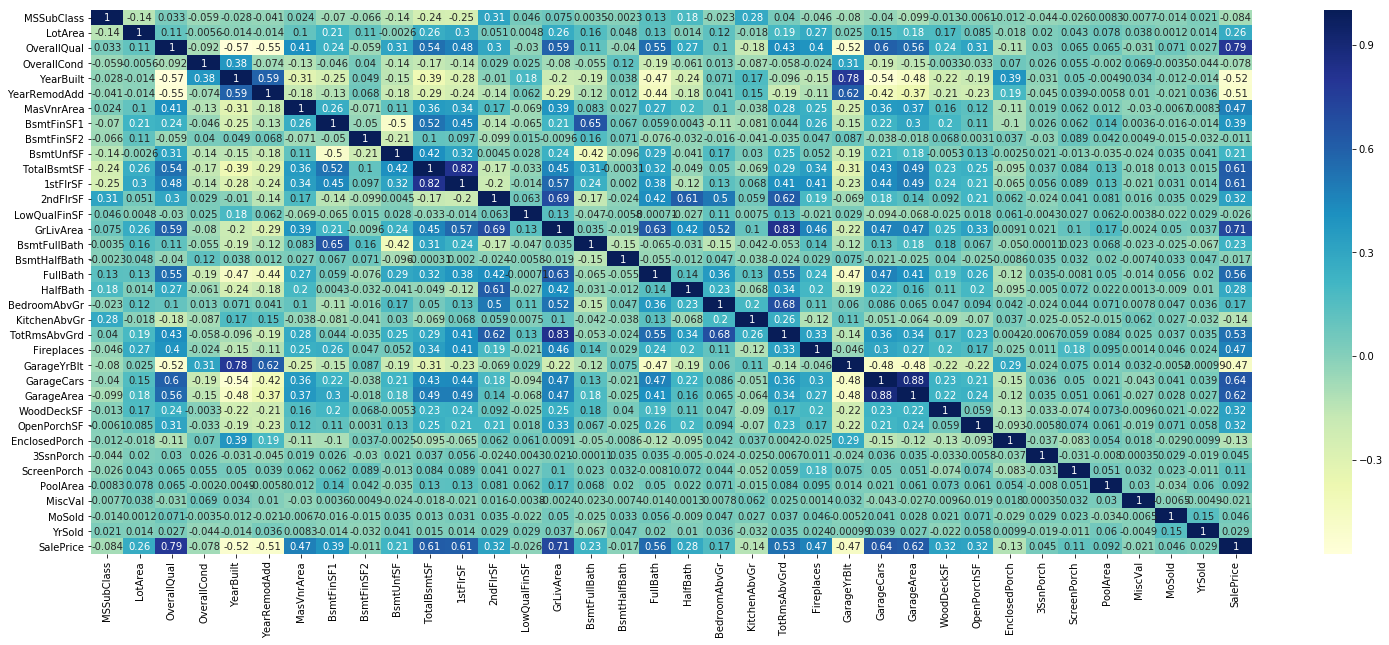

In [27]:
#lets get the correlation matrics
plt.figure(figsize = (26, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

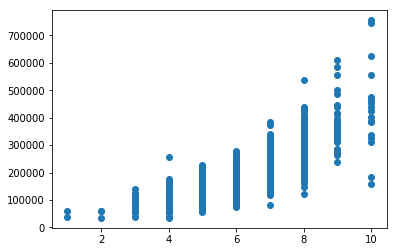

In [28]:
#as  u can see there are certain columns having high correlation with sales price 
#let us get the scatter plot of these variables
#OverallQual 
#GarageCars       
#GarageArea
#TotalBsmtSF      
#HeatingQC        
#1stFlrSF       
#GrLivArea        
#As you can see few variables have high  correlation with target  variable let us try to visualise it
plt.scatter(x=df['OverallQual'], y=df['SalePrice'])
plt.show()

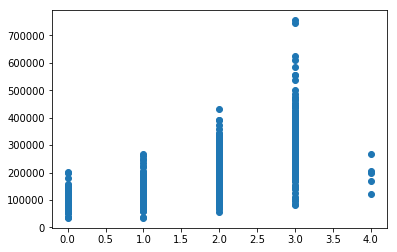

In [29]:
plt.scatter(x=df['GarageCars'], y=df['SalePrice'])
plt.show()

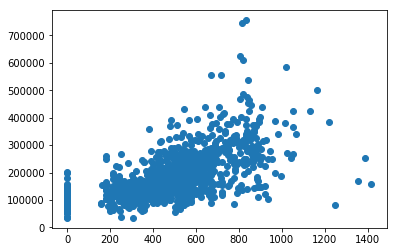

In [30]:
plt.scatter(x=df['GarageArea'], y=df['SalePrice'])
plt.show()


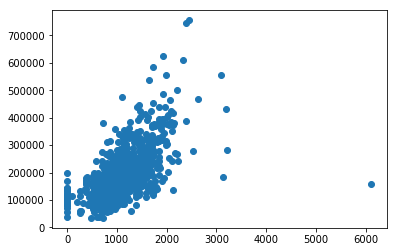

In [31]:
plt.scatter(x=df['TotalBsmtSF'], y=df['SalePrice'])
plt.show()


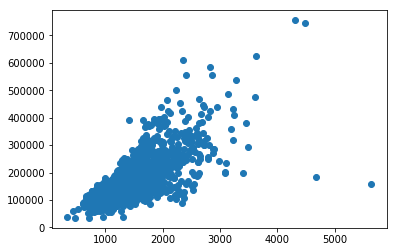

In [32]:
plt.scatter(x=df['GrLivArea'], y=df['SalePrice'])
plt.show()

In [33]:
#we can drop one the coulmns from  the pair which are highly correlated to each other  in order  to  avoid multocollinearity
#TotRmsAbvGrd and GrLivArea
df.drop('TotRmsAbvGrd', axis=1,inplace=True)
df.head()

MSSubClass MSZoning  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearBuilt    ...     WoodDeckSF OpenPorchSF EnclosedPorch 3SsnPorch ScreenPorch  PoolArea MiscVal MoSold YrSold SalePrice
0          60       RL     8450      Reg    Inside      CollgCr     2Story            7            5         16    ...              0          61             0         0           0         0       0      2     11    208500
1          20       RL     9600      Reg       FR2      Veenker     1Story            6            8         43    ...            298           0             0         0           0         0       0      5     12    181500
2          60       RL    11250      IR1    Inside      CollgCr     2Story            7            5         18    ...              0          42             0         0           0         0       0      9     11    223500
3          70       RL     9550      IR1    Corner      Crawfor     2Story            7            5        104    ...              0          35           272         0           0         0       0      2     13    140000
4          60       RL    14260      IR1       FR2      NoRidge     2Story            8            5         19    ...            192          84             0         0           0         0       0     12     11    250000

[5 rows x 54 columns]

In [34]:
#outlier treatment
df.describe()

MSSubClass        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF      ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000      ...        1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000
mean     56.897260   10516.828082     6.099315     5.575342    47.732192     34.134247   103.117123   443.639726    46.549315   567.240411      ...          94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918    11.184247  180921.195890
std      42.300571    9981.264932     1.382997     1.112799    30.202904     20.645407   180.731373   456.098091   161.319273   441.866955      ...         125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626     1.328095   79442.502883
min      20.000000    1300.000000     1.000000     1.000000     9.000000      9.000000     0.000000     0.000000     0.000000     0.000000      ...           0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000     9.000000   34900.000000
25%      20.000000    7553.500000     5.000000     5.000000    19.000000     15.000000     0.000000     0.000000     0.000000   223.000000      ...           0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000    10.000000  129975.000000
50%      50.000000    9478.500000     6.000000     5.000000    46.000000     25.000000     0.000000   383.500000     0.000000   477.500000      ...           0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000    11.000000  163000.000000
75%      70.000000   11601.500000     7.000000     6.000000    65.000000     52.000000   164.250000   712.250000     0.000000   808.000000      ...         168.000000    68.000000       0.000000     0.000000     0.000000     0.000000      0.000000     8.000000    12.000000  214000.000000
max     190.000000  215245.000000    10.000000     9.000000   147.000000     69.000000  1600.000000  5644.000000  1474.000000  2336.000000      ...         857.000000   547.000000     552.000000   508.000000   480.000000   738.000000  15500.000000    12.000000    13.000000  755000.000000

[8 rows x 35 columns]

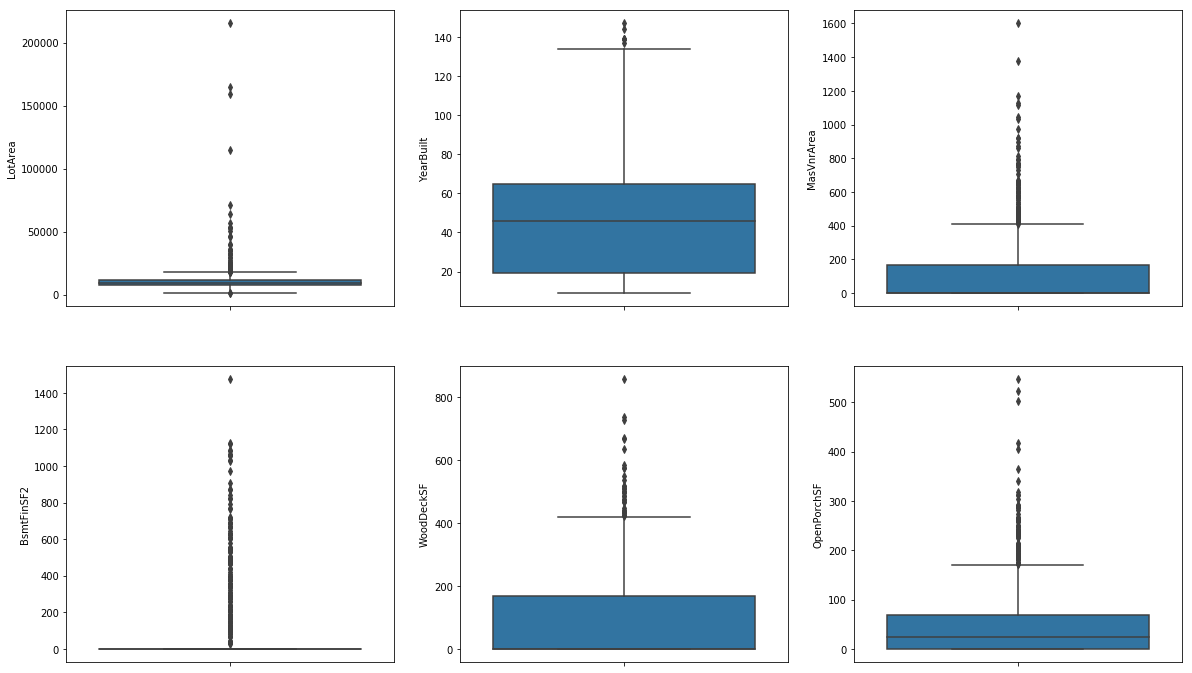

In [35]:
#Lets consider  numeric  variables  for data  issues
#get the boxplot 
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot( y=df['LotArea'])
plt.subplot(2,3,2)
sns.boxplot(y=df['YearBuilt'])
plt.subplot(2,3,3)
sns.boxplot(y=df['MasVnrArea'])
plt.subplot(2,3,4)
sns.boxplot(y=df['BsmtFinSF2'])
plt.subplot(2,3,5)
sns.boxplot(y=df['WoodDeckSF'])
plt.subplot(2,3,6)
sns.boxplot(y=df['OpenPorchSF'])
plt.show()


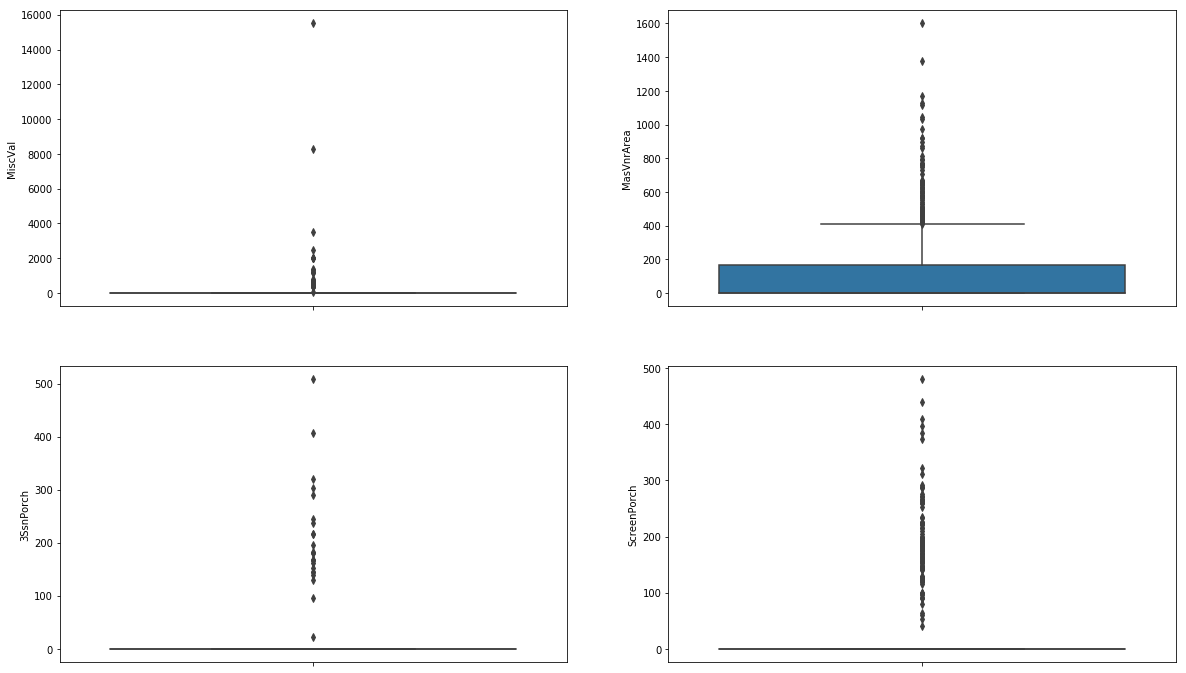

In [36]:


plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot( y=df['MiscVal'])
plt.subplot(2,2,2)
sns.boxplot(y=df['MasVnrArea'])
plt.subplot(2,2,3)
sns.boxplot(y=df['3SsnPorch'])
plt.subplot(2,2,4)
sns.boxplot(y=df['ScreenPorch'])
plt.show()


In [37]:
#remove  values above 0.99 quantile

q1=df['LotArea'].quantile(0.99)
df=df[df['LotArea']<q1]
q1=df['BsmtFinSF2'].quantile(0.99)
df=df[df['BsmtFinSF2']<q1]
q1=df['3SsnPorch'].quantile(0.99)
df=df[df['3SsnPorch']<q1]
q1=df['ScreenPorch'].quantile(0.99)
df=df[df['ScreenPorch']<q1]
q1=df['WoodDeckSF'].quantile(0.99)
df=df[df['WoodDeckSF']<q1]
q1=df['MiscVal'].quantile(0.99)
df=df[df['MiscVal']<q1]
q1=df['MasVnrArea'].quantile(0.99)
df=df[df['MasVnrArea']<q1]



In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1357 entries, 0 to 1456
Data columns (total 54 columns):
MSSubClass       1357 non-null int64
MSZoning         1357 non-null object
LotArea          1357 non-null int64
LotShape         1357 non-null object
LotConfig        1357 non-null object
Neighborhood     1357 non-null object
HouseStyle       1357 non-null object
OverallQual      1357 non-null int64
OverallCond      1357 non-null int64
YearBuilt        1357 non-null int64
YearRemodAdd     1357 non-null int64
RoofStyle        1357 non-null object
Exterior1st      1357 non-null object
Exterior2nd      1357 non-null object
MasVnrType       1357 non-null object
MasVnrArea       1357 non-null float64
ExterQual        1357 non-null object
Foundation       1357 non-null object
BsmtQual         1357 non-null object
BsmtExposure     1357 non-null object
BsmtFinType1     1357 non-null object
BsmtFinSF1       1357 non-null int64
BsmtFinSF2       1357 non-null int64
BsmtUnfSF        1357 non-

In [39]:
df_cat = df.select_dtypes(include=['object'])
df_cat.head()

MSZoning LotShape LotConfig Neighborhood HouseStyle RoofStyle Exterior1st Exterior2nd MasVnrType ExterQual Foundation BsmtQual BsmtExposure BsmtFinType1 HeatingQC KitchenQual FireplaceQu GarageType GarageFinish
0       RL      Reg    Inside      CollgCr     2Story     Gable     VinylSd     VinylSd    BrkFace        Gd      PConc       Gd           No          GLQ        Ex          Gd      Absent     Attchd          RFn
1       RL      Reg       FR2      Veenker     1Story     Gable     MetalSd     MetalSd       None        TA     CBlock       Gd           Gd          ALQ        Ex          TA          TA     Attchd          RFn
2       RL      IR1    Inside      CollgCr     2Story     Gable     VinylSd     VinylSd    BrkFace        Gd      PConc       Gd           Mn          GLQ        Ex          Gd          TA     Attchd          RFn
3       RL      IR1    Corner      Crawfor     2Story     Gable     Wd Sdng     Wd Shng       None        TA     BrkTil       TA           No          ALQ        Gd          Gd          Gd     Detchd          Unf
4       RL      IR1       FR2      NoRidge     2Story     Gable     VinylSd     VinylSd    BrkFace        Gd      PConc       Gd           Av          GLQ        Ex          Gd          TA     Attchd          RFn

In [40]:
# convert into dummies
cat_dummies = pd.get_dummies(df_cat, drop_first=True)
cat_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3        ...         FireplaceQu_TA  GarageType_Absent  GarageType_Attchd  GarageType_Basment  GarageType_BuiltIn  GarageType_CarPort  GarageType_Detchd  GarageFinish_Fin  GarageFinish_RFn  GarageFinish_Unf
0            0            0            1            0             0             0             1                  0              0              0        ...                      0                  0                  1                   0                   0                   0                  0                 0                 1                 0
1            0            0            1            0             0             0             1                  0              1              0        ...                      1                  0                  1                   0                   0                   0                  0                 0                 1                 0
2            0            0            1            0             0             0             0                  0              0              0        ...                      1                  0                  1                   0                   0                   0                  0                 0                 1                 0
3            0            0            1            0             0             0             0                  0              0              0        ...                      0                  0                  0                   0                   0                   0                  1                 0                 0                 1
4            0            0            1            0             0             0             0                  0              1              0        ...                      1                  0                  1                   0                   0                   0                  0                 0                 1                 0

[5 rows x 123 columns]

In [41]:
# drop categorical variables 
df2 = df.drop(list(df_cat.columns), axis=1)
df2.head()

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF    ...      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice
0          60     8450            7            5         16            16       196.0         706           0        150    ...               0           61              0          0            0         0        0       2      11     208500
1          20     9600            6            8         43            43         0.0         978           0        284    ...             298            0              0          0            0         0        0       5      12     181500
2          60    11250            7            5         18            17       162.0         486           0        434    ...               0           42              0          0            0         0        0       9      11     223500
3          70     9550            7            5        104            49         0.0         216           0        540    ...               0           35            272          0            0         0        0       2      13     140000
4          60    14260            8            5         19            19       350.0         655           0        490    ...             192           84              0          0            0         0        0      12      11     250000

[5 rows x 35 columns]

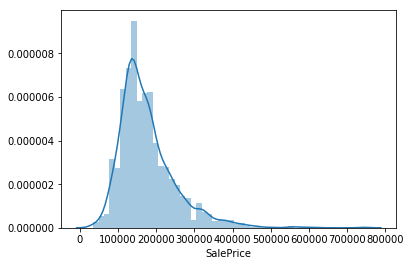

In [42]:
#lets  see the distribution of sales variable
sns.distplot(df2['SalePrice'])


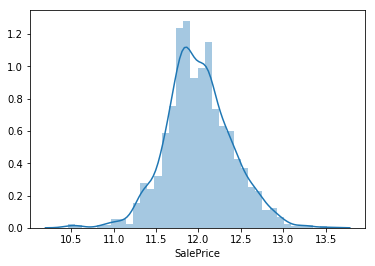

In [43]:
#The  plot  is skewed  to left
#hence use log
sns.distplot(np.log(df2['SalePrice']))

In [44]:
df2['normalised_price']=np.log(df2['SalePrice'])
df2['normalised_price'].head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: normalised_price, dtype: float64

In [45]:
df2.head()

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF        ...         OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  normalised_price
0          60     8450            7            5         16            16       196.0         706           0        150        ...                  61              0          0            0         0        0       2      11     208500         12.247694
1          20     9600            6            8         43            43         0.0         978           0        284        ...                   0              0          0            0         0        0       5      12     181500         12.109011
2          60    11250            7            5         18            17       162.0         486           0        434        ...                  42              0          0            0         0        0       9      11     223500         12.317167
3          70     9550            7            5        104            49         0.0         216           0        540        ...                  35            272          0            0         0        0       2      13     140000         11.849398
4          60    14260            8            5         19            19       350.0         655           0        490        ...                  84              0          0            0         0        0      12      11     250000         12.429216

[5 rows x 36 columns]

In [46]:
df2.drop('SalePrice', axis=1,inplace=True)
df2.head()

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF        ...         WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  normalised_price
0          60     8450            7            5         16            16       196.0         706           0        150        ...                  0           61              0          0            0         0        0       2      11         12.247694
1          20     9600            6            8         43            43         0.0         978           0        284        ...                298            0              0          0            0         0        0       5      12         12.109011
2          60    11250            7            5         18            17       162.0         486           0        434        ...                  0           42              0          0            0         0        0       9      11         12.317167
3          70     9550            7            5        104            49         0.0         216           0        540        ...                  0           35            272          0            0         0        0       2      13         11.849398
4          60    14260            8            5         19            19       350.0         655           0        490        ...                192           84              0          0            0         0        0      12      11         12.429216

[5 rows x 35 columns]

In [47]:
final_df= pd.concat([df2, cat_dummies], axis=1)
final_df.head()

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF        ...         FireplaceQu_TA  GarageType_Absent  GarageType_Attchd  GarageType_Basment  GarageType_BuiltIn  GarageType_CarPort  GarageType_Detchd  GarageFinish_Fin  GarageFinish_RFn  GarageFinish_Unf
0          60     8450            7            5         16            16       196.0         706           0        150        ...                      0                  0                  1                   0                   0                   0                  0                 0                 1                 0
1          20     9600            6            8         43            43         0.0         978           0        284        ...                      1                  0                  1                   0                   0                   0                  0                 0                 1                 0
2          60    11250            7            5         18            17       162.0         486           0        434        ...                      1                  0                  1                   0                   0                   0                  0                 0                 1                 0
3          70     9550            7            5        104            49         0.0         216           0        540        ...                      0                  0                  0                   0                   0                   0                  1                 0                 0                 1
4          60    14260            8            5         19            19       350.0         655           0        490        ...                      1                  0                  1                   0                   0                   0                  0                 0                 1                 0

[5 rows x 158 columns]

In [48]:
#train test split
y=final_df.normalised_price
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: normalised_price, dtype: float64

In [49]:
X=final_df.drop('normalised_price', axis=1)
X.head()

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF        ...         FireplaceQu_TA  GarageType_Absent  GarageType_Attchd  GarageType_Basment  GarageType_BuiltIn  GarageType_CarPort  GarageType_Detchd  GarageFinish_Fin  GarageFinish_RFn  GarageFinish_Unf
0          60     8450            7            5         16            16       196.0         706           0        150        ...                      0                  0                  1                   0                   0                   0                  0                 0                 1                 0
1          20     9600            6            8         43            43         0.0         978           0        284        ...                      1                  0                  1                   0                   0                   0                  0                 0                 1                 0
2          60    11250            7            5         18            17       162.0         486           0        434        ...                      1                  0                  1                   0                   0                   0                  0                 0                 1                 0
3          70     9550            7            5        104            49         0.0         216           0        540        ...                      0                  0                  0                   0                   0                   0                  1                 0                 0                 1
4          60    14260            8            5         19            19       350.0         655           0        490        ...                      1                  0                  1                   0                   0                   0                  0                 0                 1                 0

[5 rows x 157 columns]

In [50]:
# scaling the features
from sklearn.preprocessing import scale
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'FireplaceQu_TA', 'GarageType_Absent', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_Fin', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object', length=157)

In [51]:
# split into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [52]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [53]:
# Running RFE with the output number of the variable equal to 50
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 50)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [54]:
#columns selected here are
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 77),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', True, 1),
 ('MasVnrArea', False, 45),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 7),
 ('BsmtHalfBath', False, 87),
 ('FullBath', False, 37),
 ('HalfBath', False, 13),
 ('BedroomAbvGr', False, 98),
 ('KitchenAbvGr', True, 1),
 ('Fireplaces', False, 106),
 ('GarageYrBlt', False, 60),
 ('GarageCars', True, 1),
 ('GarageArea', False, 14),
 ('WoodDeckSF', False, 10),
 ('OpenPorchSF', False, 101),
 ('EnclosedPorch', False, 99),
 ('3SsnPorch', False, 4),
 ('ScreenPorch', False, 9),
 ('PoolArea', False, 79),
 ('MiscVal', False, 95),
 ('MoSold', False, 61),
 ('YrSold', False, 40),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MS

In [55]:
sup_col=X_train.columns[rfe.support_]

In [56]:
print(sup_col)

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr', 'GarageCars', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Crawfor', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'HouseStyle_2.5Fin', 'HouseStyle_2Story', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior2nd_CBlock', 'Foundation_PConc', 'Foundation_Stone', 'BsmtQual_Ex', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_Av', 'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_No', 'BsmtFinType1_Absent', 'HeatingQC_TA', 'KitchenQual_Gd', 'KitchenQual_TA', 'GarageType_Absent', 'GarageType_Attchd', 'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageFinish_Fin', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object')


In [57]:
rfe_train=X_train[sup_col]


In [58]:
X_train = rfe_train[rfe_train.columns]
X_test =  X_test[X_train.columns]

In [59]:
#model building evaluation
#Ridge Regression
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.7s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [60]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=400]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score       ...         mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0       0.028802  2.551550e-02         0.013401    2.381378e-02      0.0001  {'alpha': 0.0001}          -0.092215          -0.078402          -0.080116          -0.090042       ...               -0.084510        0.005555               25           -0.075972           -0.078591           -0.078424           -0.076651           -0.077938         -0.077515         0.001029
1       0.013201  9.411189e-03         0.002400    1.496886e-03       0.001   {'alpha': 0.001}          -0.092215          -0.078401          -0.080116          -0.090042       ...               -0.084509        0.005555               24           -0.075972           -0.078591           -0.078424           -0.076651           -0.077938         -0.077515         0.001029
2       0.017401  1.531893e-02         0.001000    1.168008e-07        0.01    {'alpha': 0.01}          -0.092217          -0.078400          -0.080113          -0.090042       ...               -0.084509        0.005556               23           -0.075971           -0.078592           -0.078425           -0.076651           -0.077939         -0.077515         0.001029
3       0.007600  1.496822e-03         0.001000    1.168008e-07        0.05    {'alpha': 0.05}          -0.092224          -0.078396          -0.080100          -0.090041       ...               -0.084505        0.005562               22           -0.075969           -0.078593           -0.078427           -0.076651           -0.077940         -0.077516         0.001031
4       0.005000  1.168008e-07         0.000800    3.999710e-04         0.1     {'alpha': 0.1}          -0.092233          -0.078390          -0.080084          -0.090040       ...               -0.084500        0.005569               21           -0.075965           -0.078595           -0.078430           -0.076651           -0.077943         -0.077517         0.001033

[5 rows x 21 columns]

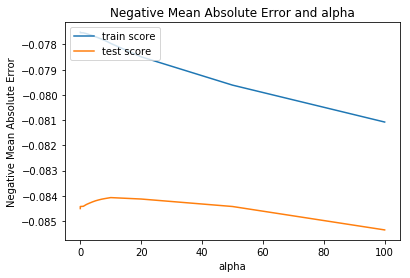

In [61]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [62]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.02677393,  0.08204552,  0.05345126, -0.0606873 , -0.0214129 ,
        0.04358963,  0.00171422,  0.00547974,  0.05244008,  0.02507533,
        0.06740032,  0.00667936,  0.07835832, -0.01636097,  0.03933766,
        0.06341328,  0.03396466,  0.14011288,  0.09555004,  0.02306478,
        0.01892258,  0.01142273, -0.01306679, -0.01911598,  0.03077008,
        0.02630022,  0.01325644, -0.00178782, -0.00178782,  0.01599399,
        0.01004278,  0.02206723, -0.00781017, -0.00438036, -0.00612627,
       -0.00344718,  0.014602  , -0.00131298, -0.00624097,  0.00342354,
       -0.01534008, -0.01680953, -0.01829055,  0.00047572,  0.02775349,
        0.01424274,  0.02208079,  0.00464865,  0.00442092, -0.00823407])

In [63]:
#make  the df with  features  and respected coefficient
r_df=pd.DataFrame({'Top_features':X_train.columns, 'Res_coefficient':ridge.coef_.round(3)})
r_df.reset_index(drop=True, inplace=True)
r_df

Top_features  Res_coefficient
0                LotArea            0.027
1            OverallQual            0.082
2            OverallCond            0.053
3              YearBuilt           -0.061
4           YearRemodAdd           -0.021
5             BsmtFinSF1            0.044
6             BsmtFinSF2            0.002
7              BsmtUnfSF            0.005
8            TotalBsmtSF            0.052
9               1stFlrSF            0.025
10              2ndFlrSF            0.067
11          LowQualFinSF            0.007
12             GrLivArea            0.078
13          KitchenAbvGr           -0.016
14            GarageCars            0.039
15           MSZoning_FV            0.063
16           MSZoning_RH            0.034
17           MSZoning_RL            0.140
18           MSZoning_RM            0.096
19  Neighborhood_Crawfor            0.023
20  Neighborhood_Somerst            0.019
21  Neighborhood_StoneBr            0.011
22     HouseStyle_2.5Fin           -0.013
23     HouseStyle_2Story           -0.019
24       RoofStyle_Gable            0.031
25         RoofStyle_Hip            0.026
26   Exterior1st_BrkFace            0.013
27    Exterior1st_CBlock           -0.002
28    Exterior2nd_CBlock           -0.002
29      Foundation_PConc            0.016
30      Foundation_Stone            0.010
31           BsmtQual_Ex            0.022
32           BsmtQual_Fa           -0.008
33           BsmtQual_Gd           -0.004
34           BsmtQual_TA           -0.006
35       BsmtExposure_Av           -0.003
36       BsmtExposure_Gd            0.015
37       BsmtExposure_Mn           -0.001
38       BsmtExposure_No           -0.006
39   BsmtFinType1_Absent            0.003
40          HeatingQC_TA           -0.015
41        KitchenQual_Gd           -0.017
42        KitchenQual_TA           -0.018
43     GarageType_Absent            0.000
44     GarageType_Attchd            0.028
45    GarageType_BuiltIn            0.014
46     GarageType_Detchd            0.022
47      GarageFinish_Fin            0.005
48      GarageFinish_RFn            0.004
49      GarageFinish_Unf           -0.008

In [64]:
# Running RFE with the output number of the variable equal to 15
X_train_R = X_train[r_df.Top_features]
lm = LinearRegression()
lm.fit(X_train_R, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train_R, y_train)


In [65]:
list(zip(X_train_R.columns,rfe.support_,rfe.ranking_))


[('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 2),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 32),
 ('BsmtUnfSF', False, 31),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 7),
 ('2ndFlrSF', False, 16),
 ('LowQualFinSF', False, 20),
 ('GrLivArea', True, 1),
 ('KitchenAbvGr', False, 13),
 ('GarageCars', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Neighborhood_Crawfor', True, 1),
 ('Neighborhood_Somerst', False, 8),
 ('Neighborhood_StoneBr', False, 33),
 ('HouseStyle_2.5Fin', False, 14),
 ('HouseStyle_2Story', False, 10),
 ('RoofStyle_Gable', False, 3),
 ('RoofStyle_Hip', False, 4),
 ('Exterior1st_BrkFace', False, 12),
 ('Exterior1st_CBlock', False, 29),
 ('Exterior2nd_CBlock', False, 30),
 ('Foundation_PConc', False, 15),
 ('Foundation_Stone', False, 11),
 ('BsmtQual_Ex', True, 1),
 ('BsmtQual_Fa', False, 22),
 ('BsmtQual_Gd'

In [66]:
final_ridge_df=pd.DataFrame(list(zip(X_train_R.columns,rfe.support_,rfe.ranking_)), columns=['Top_features','RFE_support', 'RFE_ranking'])
final_ridge_df.reset_index(drop=True, inplace=True)
final_ridge_df=final_ridge_df[final_ridge_df.RFE_ranking==1]
final_ridge_df.reset_index(drop=True, inplace=True)
final_ridge_df



Top_features  RFE_support  RFE_ranking
0                LotArea         True            1
1            OverallQual         True            1
2            OverallCond         True            1
3              YearBuilt         True            1
4             BsmtFinSF1         True            1
5            TotalBsmtSF         True            1
6              GrLivArea         True            1
7             GarageCars         True            1
8            MSZoning_FV         True            1
9            MSZoning_RH         True            1
10           MSZoning_RL         True            1
11           MSZoning_RM         True            1
12  Neighborhood_Crawfor         True            1
13           BsmtQual_Ex         True            1
14          HeatingQC_TA         True            1

In [67]:
f=pd.merge(final_ridge_df, r_df, how='inner',left_on='Top_features', right_on='Top_features')
f=f.sort_values('Res_coefficient', ascending=False)
f.reset_index(drop=True, inplace=True)
f
#top 15 featues are

Top_features  RFE_support  RFE_ranking  Res_coefficient
0            MSZoning_RL         True            1            0.140
1            MSZoning_RM         True            1            0.096
2            OverallQual         True            1            0.082
3              GrLivArea         True            1            0.078
4            MSZoning_FV         True            1            0.063
5            OverallCond         True            1            0.053
6            TotalBsmtSF         True            1            0.052
7             BsmtFinSF1         True            1            0.044
8             GarageCars         True            1            0.039
9            MSZoning_RH         True            1            0.034
10               LotArea         True            1            0.027
11  Neighborhood_Crawfor         True            1            0.023
12           BsmtQual_Ex         True            1            0.022
13          HeatingQC_TA         True            1           -0.015
14             YearBuilt         True            1           -0.061

In [68]:
lasso = Lasso()

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,0.0008,0.0009, 0.001,
                    0.005, 0.01]}
 

# cross validation
l_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

l_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    3.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.005, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [69]:
l_cv_results = pd.DataFrame(l_model_cv.cv_results_)
l_cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score       ...         mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0       0.145408      0.026995           0.0022    1.469769e-03      0.0001  {'alpha': 0.0001}          -0.092360          -0.078125          -0.079913          -0.089852       ...               -0.084403        0.005652               10           -0.075921           -0.078617           -0.078458           -0.076665           -0.077956         -0.077523         0.001055
1       0.110006      0.028030           0.0020    1.095627e-03      0.0002  {'alpha': 0.0002}          -0.092558          -0.077842          -0.079724          -0.089658       ...               -0.084313        0.005764                9           -0.075870           -0.078649           -0.078513           -0.076678           -0.077984         -0.077539         0.001087
2       0.057803      0.005419           0.0016    4.899208e-04      0.0003  {'alpha': 0.0003}          -0.092806          -0.077566          -0.079522          -0.089483       ...               -0.084228        0.005900                8           -0.075854           -0.078688           -0.078572           -0.076714           -0.078028         -0.077571         0.001108
3       0.043402      0.003200           0.0014    4.899208e-04      0.0004  {'alpha': 0.0004}          -0.093149          -0.077376          -0.079330          -0.089322       ...               -0.084186        0.006047                7           -0.075876           -0.078737           -0.078647           -0.076752           -0.078079         -0.077618         0.001123
4       0.036602      0.002417           0.0010    1.507891e-07      0.0005  {'alpha': 0.0005}          -0.093538          -0.077193          -0.079142          -0.089168       ...               -0.084164        0.006207                6           -0.075916           -0.078801           -0.078745           -0.076799           -0.078138         -0.077680         0.001139

[5 rows x 21 columns]

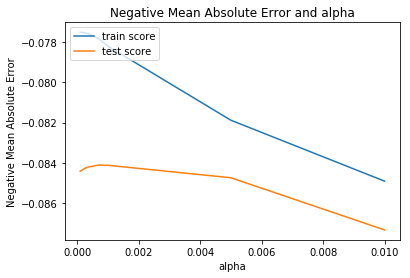

In [70]:
# plotting mean test and train scoes with alpha 
l_cv_results['param_alpha'] = l_cv_results['param_alpha'].astype('float64')

# plotting
plt.plot(l_cv_results['param_alpha'], l_cv_results['mean_train_score'])
plt.plot(l_cv_results['param_alpha'], l_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()



In [71]:
alpha =0.005

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [72]:
lasso.coef_

array([ 0.02251713,  0.09788768,  0.04832473, -0.05960644, -0.01901329,
        0.03752908,  0.        , -0.        ,  0.04364815,  0.        ,
        0.        , -0.        ,  0.12840622, -0.01097962,  0.04048312,
        0.0042294 ,  0.        ,  0.03022841, -0.        ,  0.01817891,
        0.01441019,  0.00534595, -0.004735  ,  0.        ,  0.00203843,
       -0.        ,  0.00647286, -0.        , -0.        ,  0.01432321,
        0.        ,  0.02415884, -0.        ,  0.        , -0.        ,
       -0.        ,  0.01072541,  0.        , -0.        ,  0.        ,
       -0.01510608,  0.        , -0.00349937, -0.00663265,  0.00301143,
        0.00247619, -0.        ,  0.        ,  0.        , -0.0067756 ])

In [73]:
#make the datframe in which featuresalong with ridge coefficient  is present
l_df=pd.DataFrame({'Top_features_l':X_train.columns, 'Res_coefficient_l':lasso.coef_.round(3)})
l_df.reset_index(drop=True, inplace=True)
l_df


Top_features_l  Res_coefficient_l
0                LotArea              0.023
1            OverallQual              0.098
2            OverallCond              0.048
3              YearBuilt             -0.060
4           YearRemodAdd             -0.019
5             BsmtFinSF1              0.038
6             BsmtFinSF2              0.000
7              BsmtUnfSF             -0.000
8            TotalBsmtSF              0.044
9               1stFlrSF              0.000
10              2ndFlrSF              0.000
11          LowQualFinSF             -0.000
12             GrLivArea              0.128
13          KitchenAbvGr             -0.011
14            GarageCars              0.040
15           MSZoning_FV              0.004
16           MSZoning_RH              0.000
17           MSZoning_RL              0.030
18           MSZoning_RM             -0.000
19  Neighborhood_Crawfor              0.018
20  Neighborhood_Somerst              0.014
21  Neighborhood_StoneBr              0.005
22     HouseStyle_2.5Fin             -0.005
23     HouseStyle_2Story              0.000
24       RoofStyle_Gable              0.002
25         RoofStyle_Hip             -0.000
26   Exterior1st_BrkFace              0.006
27    Exterior1st_CBlock             -0.000
28    Exterior2nd_CBlock             -0.000
29      Foundation_PConc              0.014
30      Foundation_Stone              0.000
31           BsmtQual_Ex              0.024
32           BsmtQual_Fa             -0.000
33           BsmtQual_Gd              0.000
34           BsmtQual_TA             -0.000
35       BsmtExposure_Av             -0.000
36       BsmtExposure_Gd              0.011
37       BsmtExposure_Mn              0.000
38       BsmtExposure_No             -0.000
39   BsmtFinType1_Absent              0.000
40          HeatingQC_TA             -0.015
41        KitchenQual_Gd              0.000
42        KitchenQual_TA             -0.003
43     GarageType_Absent             -0.007
44     GarageType_Attchd              0.003
45    GarageType_BuiltIn              0.002
46     GarageType_Detchd             -0.000
47      GarageFinish_Fin              0.000
48      GarageFinish_RFn              0.000
49      GarageFinish_Unf             -0.007

In [74]:
# Running RFE with the output number of the variable equal to 15
X_train_l = X_train[l_df.Top_features_l]
lm = LinearRegression()
lm.fit(X_train_l, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train_l, y_train)


In [75]:
list(zip(X_train_l.columns,rfe.support_,rfe.ranking_))


[('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 2),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 32),
 ('BsmtUnfSF', False, 31),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 7),
 ('2ndFlrSF', False, 16),
 ('LowQualFinSF', False, 20),
 ('GrLivArea', True, 1),
 ('KitchenAbvGr', False, 13),
 ('GarageCars', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Neighborhood_Crawfor', True, 1),
 ('Neighborhood_Somerst', False, 8),
 ('Neighborhood_StoneBr', False, 33),
 ('HouseStyle_2.5Fin', False, 14),
 ('HouseStyle_2Story', False, 10),
 ('RoofStyle_Gable', False, 3),
 ('RoofStyle_Hip', False, 4),
 ('Exterior1st_BrkFace', False, 12),
 ('Exterior1st_CBlock', False, 29),
 ('Exterior2nd_CBlock', False, 30),
 ('Foundation_PConc', False, 15),
 ('Foundation_Stone', False, 11),
 ('BsmtQual_Ex', True, 1),
 ('BsmtQual_Fa', False, 22),
 ('BsmtQual_Gd'

In [76]:
final_lasso_df=pd.DataFrame(list(zip(X_train_l.columns,rfe.support_,rfe.ranking_)), columns=['Top_features_l','RFE_support_l', 'RFE_ranking_l'])
final_lasso_df.reset_index(drop=True, inplace=True)
final_lasso_df=final_lasso_df[final_lasso_df.RFE_ranking_l==1]
final_lasso_df.reset_index(drop=True, inplace=True)
final_lasso_df

Top_features_l  RFE_support_l  RFE_ranking_l
0                LotArea           True              1
1            OverallQual           True              1
2            OverallCond           True              1
3              YearBuilt           True              1
4             BsmtFinSF1           True              1
5            TotalBsmtSF           True              1
6              GrLivArea           True              1
7             GarageCars           True              1
8            MSZoning_FV           True              1
9            MSZoning_RH           True              1
10           MSZoning_RL           True              1
11           MSZoning_RM           True              1
12  Neighborhood_Crawfor           True              1
13           BsmtQual_Ex           True              1
14          HeatingQC_TA           True              1

In [77]:
f2=pd.merge(final_lasso_df, l_df, how='inner',left_on='Top_features_l', right_on='Top_features_l')
f2=f2.sort_values('Res_coefficient_l', ascending=False)
f2.reset_index(drop=True, inplace=True)
f2
#these are top 15 featues 

Top_features_l  RFE_support_l  RFE_ranking_l  Res_coefficient_l
0              GrLivArea           True              1              0.128
1            OverallQual           True              1              0.098
2            OverallCond           True              1              0.048
3            TotalBsmtSF           True              1              0.044
4             GarageCars           True              1              0.040
5             BsmtFinSF1           True              1              0.038
6            MSZoning_RL           True              1              0.030
7            BsmtQual_Ex           True              1              0.024
8                LotArea           True              1              0.023
9   Neighborhood_Crawfor           True              1              0.018
10           MSZoning_FV           True              1              0.004
11           MSZoning_RH           True              1              0.000
12           MSZoning_RM           True              1             -0.000
13          HeatingQC_TA           True              1             -0.015
14             YearBuilt           True              1             -0.060

In [78]:
#get mean squared error
from sklearn.metrics import mean_squared_error

In [79]:
#mean_squared error for Ridge
mean_squared_error(y_test, ridge.predict(X_test))

0.014188308023426435

In [80]:
#mean_squared error for Ridge
mean_squared_error(y_test, lasso.predict(X_test))

0.01377815760957175